In [161]:
import cv2
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display

In [162]:
annotation= '../../dataset/train.json'
data_dir = '../../dataset'
coco=COCO(annotation)
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
class_color=["#f38181","#f08a5d","#f9ed69","#a3de83","#2eb872","#70a1d7","#3490de","#0096ff","#e35ddc","#9738c9"]


loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


In [163]:
# choose the image ID here!

def get_img_with_annot(id):

    img_info=coco.loadImgs(id)[0]
    path=os.path.join(data_dir, img_info['file_name'])
    fig, ax = plt.subplots()
    img=mpimg.imread(path).copy()
    plt.imshow(img)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    fig.set_size_inches(10, 10)
    plt.title(f"Image and Annotation of ID: {id}")
    plt.text(0,1045,f"Number of Objects: {len(coco.getAnnIds(id))}")
    for a in coco.getAnnIds(id):
        x,y,w,h=coco.anns[a]['bbox']
        rect=patches.Rectangle((x,y),w,h,linewidth=1,edgecolor=class_color[coco.anns[a]['category_id']],facecolor='none')
        plt.text(x,y,classes[coco.anns[a]['category_id']],bbox=dict(facecolor=class_color[coco.anns[a]['category_id']], pad=0.2,lw=0))
        ax.add_patch(rect)

    plt.imshow(img)

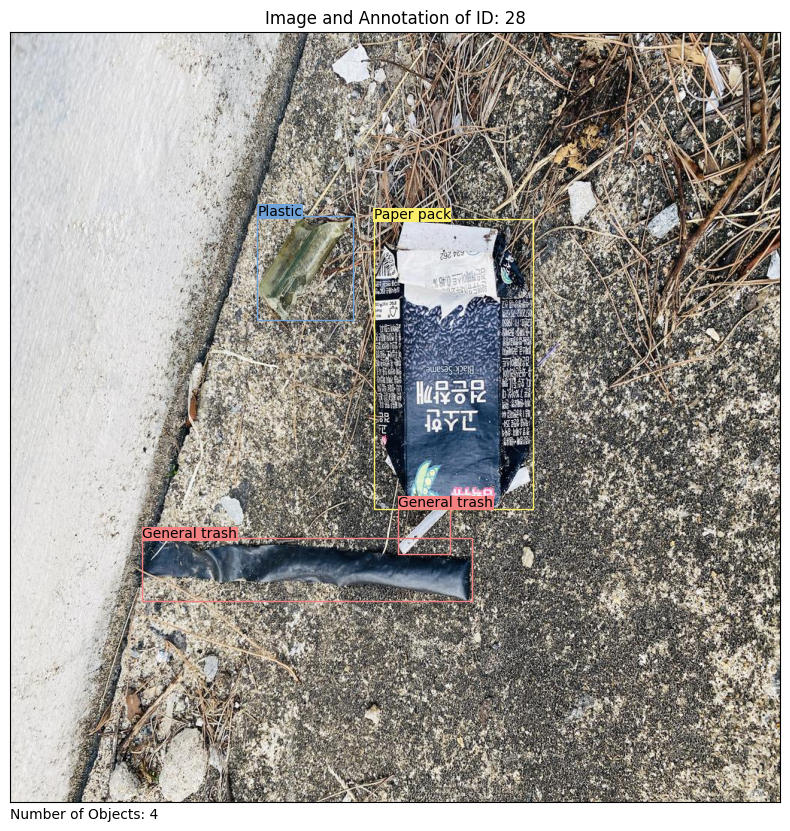

In [164]:
# set ID of the Image Here!
ID=28

get_img_with_annot(ID)